<a href="https://colab.research.google.com/github/rahul-727/Predictive-Analytics/blob/main/2348544_Lab1_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('/content/Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#  Data Cleaning and Preparation

In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
df = df.dropna(subset=['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'InvoiceDate', 'CustomerID', 'Country'])
# Removing duplicates
df = df.drop_duplicates()

# Filtering irrelevant data (e.g., negative quantities)
df = df[df['Quantity'] > 0]

# Preview the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


# Q1.2: Summarize the dataset

In [8]:
# Descriptive statistics for Quantity and UnitPrice
summary_stats = df[['Quantity', 'UnitPrice']].describe()

# Extracting year and month from InvoiceDate for further analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

summary_stats

,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


# Q2. Sales Analysis

 Top 10 best-selling products by quantity

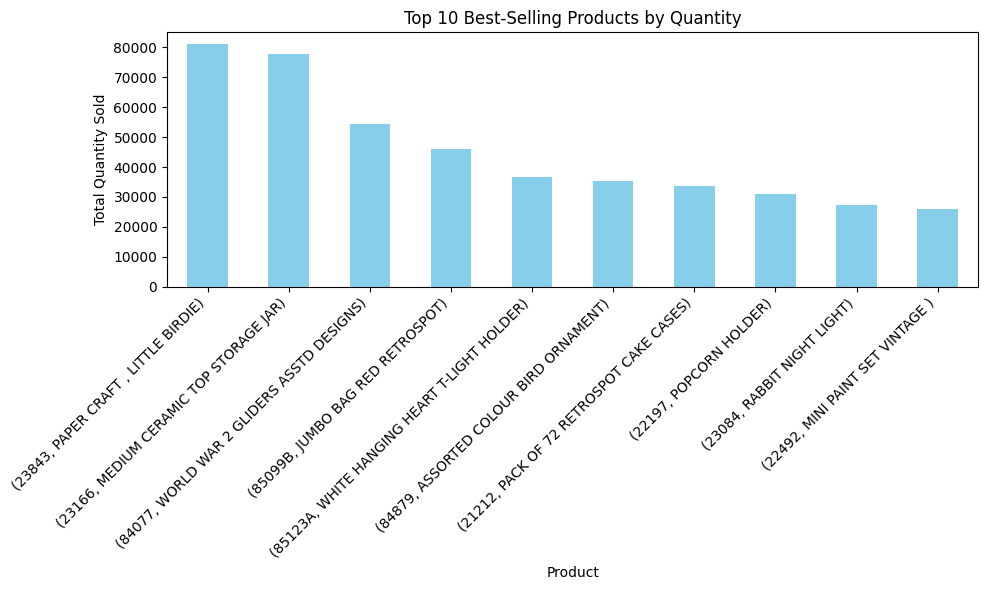

In [9]:
# Group by StockCode and Description to get total quantity sold
top_10_products = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)

top_10_products

plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Total revenue generated by each product

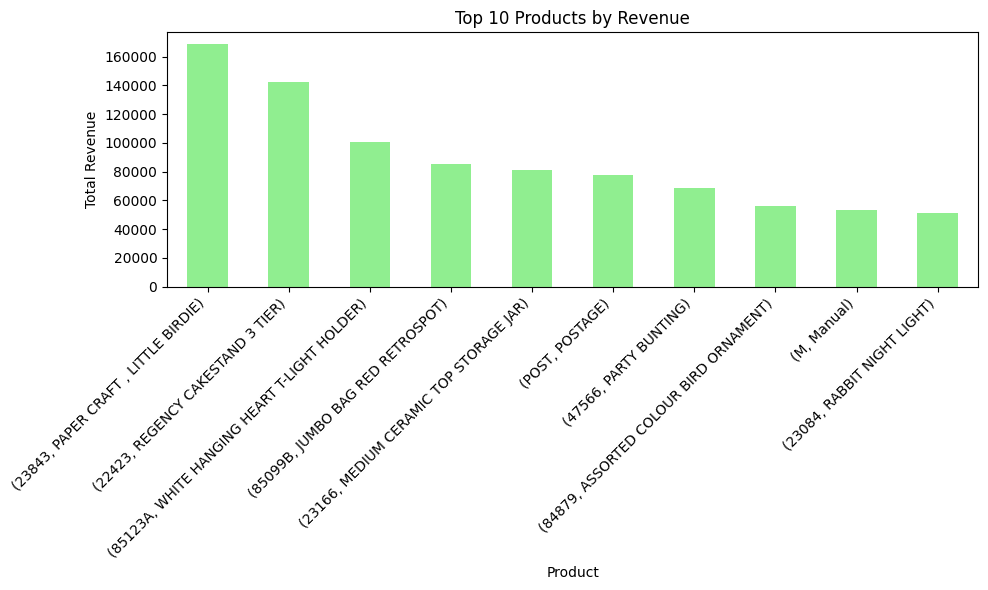

In [10]:
# Calculating total revenue for each product
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby(['StockCode', 'Description'])['TotalSales'].sum().sort_values(ascending=False)

product_revenue

top_10_revenue_products = product_revenue.head(10)  # Get top 10 products by revenue

plt.figure(figsize=(10, 6))
top_10_revenue_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Monthly revenue trend

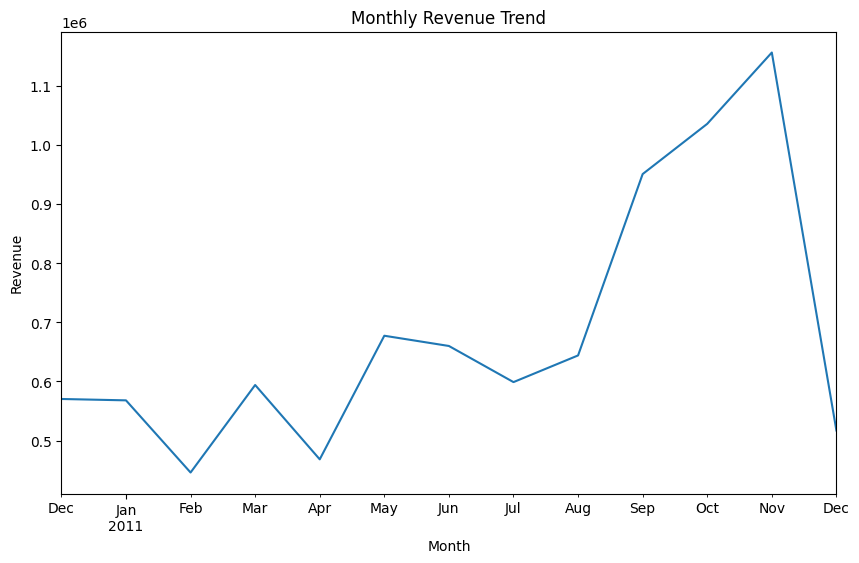

In [11]:
# Grouping by YearMonth to get monthly revenue
monthly_revenue = df.groupby('YearMonth')['TotalSales'].sum()

# Plotting the monthly revenue trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_revenue.plot()
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()

# Q3. Customer Behaviour

Unique customers and percentage of sales by repeat customers

In [12]:
# Number of unique customers
unique_customers = df['CustomerID'].nunique()

# Percentage of sales by repeat customers
repeat_customers = df[df.duplicated('CustomerID', keep=False)]
repeat_sales_percentage = (repeat_customers['TotalSales'].sum() / df['TotalSales'].sum()) * 100

unique_customers, repeat_sales_percentage

(4339, 98.89777250463712)

Average order value (total sales per invoice)

In [13]:
# Calculating average order value per invoice
avg_order_value = df.groupby('InvoiceNo')['TotalSales'].sum().mean()

# Average order value by country
avg_order_value_country = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)

avg_order_value, avg_order_value_country

(479.4566731765214,
 Country
 Netherlands             120.798282
 Australia               116.937340
 Japan                   116.561900
 Singapore                95.852658
 Sweden                   85.261844
 Denmark                  49.882474
 Lithuania                47.458857
 Lebanon                  37.641778
 EIRE                     36.699289
 Brazil                   35.737500
 Norway                   33.736418
 Czech Republic           33.069600
 Finland                  32.913985
 Greece                   32.831172
 Bahrain                  32.258824
 Switzerland              30.642752
 Israel                   29.452408
 United Arab Emirates     27.974706
 Channel Islands          27.363507
 Austria                  25.624824
 Germany                  25.332713
 France                   25.091187
 Spain                    24.822000
 Malta                    24.335625
 Canada                   24.280662
 Iceland                  23.681319
 Italy                    23.064960

Top countries contributing to sales revenue

In [14]:
# Grouping by country to get total revenue per country
country_revenue = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

country_revenue

,TotalSales
Country,
United Kingdom,7285024.644
Netherlands,285446.340
EIRE,265262.460
Germany,228678.400
France,208934.310
Australia,138453.810
Spain,61558.560
Switzerland,56443.950
Belgium,41196.340


# Q4. Product Performance

Top 5 countries with the highest average revenue per transaction

In [15]:
# Calculating average revenue per transaction for each country
avg_revenue_per_transaction = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False).head(5)

avg_revenue_per_transaction

,TotalSales
Country,
Netherlands,120.798282
Australia,116.937340
Japan,116.561900
Singapore,95.852658
Sweden,85.261844


Seasonal product performance